In [ ]:
import numpy as np
import math
import random
import time


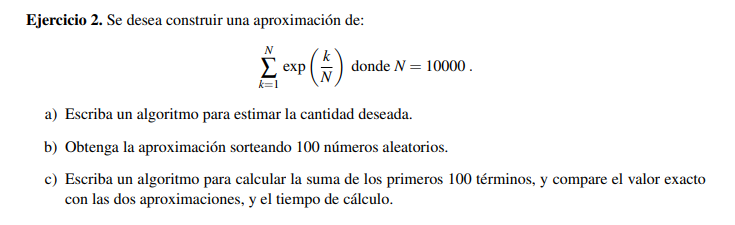



In [ ]:
N = 10_000

def fun(x):
  return np.exp(x / N)

In [ ]:
def ej2_a():
  sum = 0
  for i in range(1, N+1):
    sum += np.exp(i/N)

  return sum


def ej2_b(nsim):
  sum = 0
  for _ in range(nsim):
    sum += fun(int(random.random()*N)+1)

  return (sum / nsim) * N

print(ej2_a())
print(ej2_b(100))

17183.677439823703
17541.960039121197


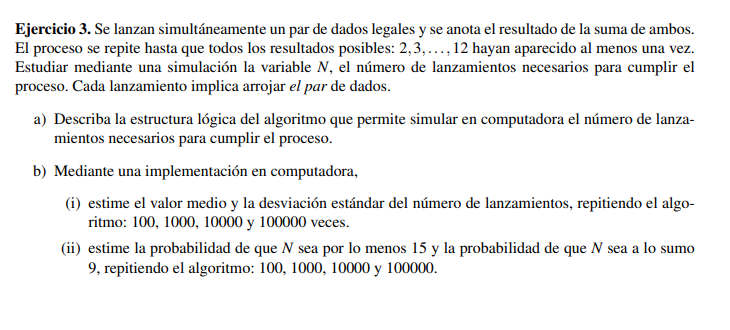




In [ ]:
def simulation3():
  results = [i for i in range(2,13)]
  i = 0
  while len(results) != 0:
    res = random.randint(1,6) + random.randint(1,6)
    i += 1
    if res in results:
      results.remove(res)
  return i

def media(nsim):
  N = 0
  for _ in range(nsim):
    N += simulation3()
  return N / nsim

def var(nsim):
  m = media(nsim)
  sum = 0
  for _ in range(nsim):
    sum += (simulation3() - m) ** 2
  return np.sqrt(sum / nsim-1)

34.77650806219621

In [ ]:
def ej3bii(nsim):
  quince_o_mas = 0
  nueve_o_menos = 0
  for _ in range(nsim):
    i = simulation3()
    if i >= 15:
      quince_o_mas += 1
    elif i <= 9:
      nueve_o_menos += 1

  return (quince_o_mas / nsim, nueve_o_menos / nsim)

for nsim in [100, 1000, 10_000, 100_000]:
  tupla = ej3bii(nsim)
  print(f"Probabilidad de que N sea 15 o mas {tupla[0]} ({nsim} simulaciones)")
  print(f"Probabilidad de que N sea 9 o menos {tupla[1]} ({nsim} simulaciones)")

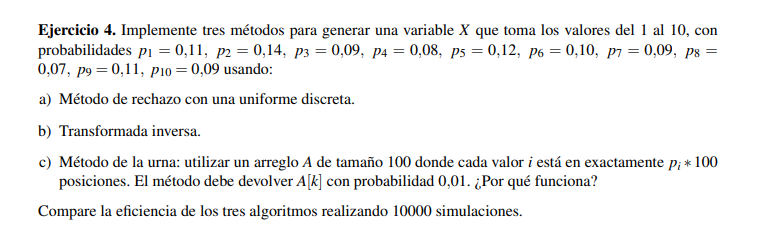

In [ ]:
p = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
#     1     2      3    4     5     6     7     8     9      10
def rechazo_uniforme_discreta():
  # Elegimos el c = mayor_valor / probabilidad_de_que_salga = 0.14/0.10 = 1.4
  c = 0.14 # c*0.1 = 0.14
  while True:
    y = int(random.random() * 10) + 1
    u = random.random()
    if u < p[y-1] / c:
      return y


In [ ]:
def transformada_inversa():
  u = random.random()
  if u <0.14:
      return 2
  elif u < 0.26:
      return 5
  elif u < 0.37:
      return 1
  elif u < 0.48:
      return 9
  elif u < 0.58:
      return 6
  elif u < 0.67:
      return 10
  elif u < 0.76:
      return 7
  elif u < 0.85:
      return 3
  elif u < 0.93:
      return 4
  else:
      return 8

In [ ]:
def urna(p, M):
  # Crear urna
  A = []
  for i in range(len(p)):
    for j in range(int(M * p[i])):
      A.append(i+1)

  return A[int(random.random() * M)]


urna(p, 100)

4

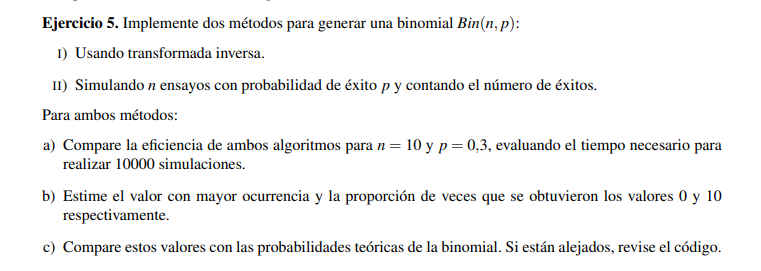

In [ ]:
def bin_trans_inv(n, p):
  c = p / (1-p)
  prob = (1-p) ** n
  F = prob; i = 0
  U = random.random()
  while U >= F:
    prob *= c * (n-i) / (i+1)
    F += prob
    i += 1
  return i

def bin(n, p):
  cont = 0
  for _ in range(n):
    u = random.random()
    if u <= p:
      cont += 1;

  return cont

def benchmark():
  time_start = time.perf_counter()
  for _ in range(10_000):
    bin_trans_inv(10, 0.3)

  time_end = time.perf_counter()
  trans_inversa = time_end - time_start

  time_start = time.perf_counter()
  for _ in range(10_000):
    bin(10, 0.3)

  time_end = time.perf_counter()
  bin_ = time_end - time_start

  print(f"La transformada inversa tardo {trans_inversa}")
  print(f"La otra (xd) tardo {bin_}")

benchmark()
# La transformada inversa demora menos

def ejc(n, p):
  ocurrencias_binomial = [0] * (n+1)
  ocurrencias_transformada_inversa = [0] * (n+1)

  for _ in range(10_000):
    a = bin_trans_inv(n, p)
    b = bin(n, p)

    ocurrencias_binomial[a] += 1
    ocurrencias_transformada_inversa[b] += 1

  max_i = 0
  max = 0
  for i in range(n+1):
    if max < ocurrencias_transformada_inversa[i]:
      max = ocurrencias_transformada_inversa[i]
      max_i = i

  print(f"Mayor ocurrencia para la binomial simulada {max_i}")
  print(f"El 0 aparece {ocurrencias_transformada_inversa[0]} veces, el 10 aparece {ocurrencias_transformada_inversa[9]} veces")

  max_i = 0
  max = 0
  for i in range(n+1):
    if max < ocurrencias_binomial[i]:
      max = ocurrencias_binomial[i]
      max_i = i

  print(f"Mayor ocurrencia para la binomial simulada {max_i}")
  print(f"El 0 aparece {ocurrencias_binomial[0]} veces, el 10 aparece {ocurrencias_binomial[9]} veces")


ejc(10, 0.3)


La transformada inversa tardo 0.0204414810000344
La otra (xd) tardo 0.015097987999979523
Mayor ocurrencia para la binomial simulada 3
El 0 aparece 265 veces, el 10 aparece 2 veces
Mayor ocurrencia para la binomial simulada 3
El 0 aparece 280 veces, el 10 aparece 0 veces


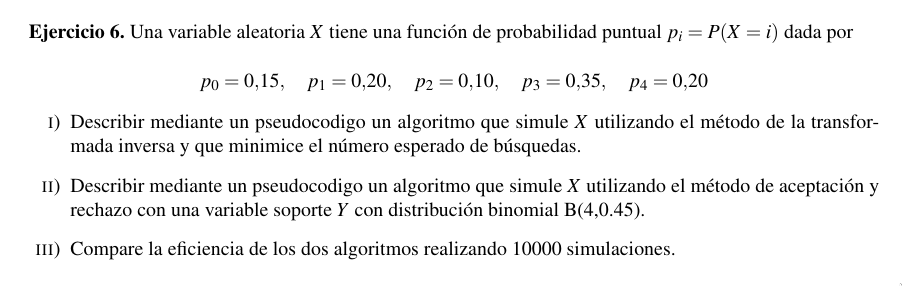

In [ ]:
def ej6_i():
  u = random.random()
  if u < 0.35:
    return 3
  if u < 0.55:
    return 4
  if u < 0.75:
    return 1
  if u < 0.90:
    return 0
  else:
    return 2

def p_bin(n, p, i):
  return ((math.factorial(n) / (math.factorial(n-i) * math.factorial(i))) * p**(i) * (1-p)**(n-i))


def ej6_ii():
  p = [0.15, 0.20, 0.10, 0.35, 0.20]
  c = 8.53528425545 # 0.35 / P(x=4)
  y = bin(4, 0.45)
  qy = p_bin(4, 0.45, y)
  while True:
    u = random.random()
    if u < p[y] / (c * qy):
      return y
    y = bin(4, 0.45)
    qy = p_bin(4, 0.45, y)

a = [0] * 5
b = [0] * 5
nsim = 10_000
for _ in range(nsim):
  num = ej6_ii()
  a[num] += 1
  num1 = ej6_i()
  b[num1] += 1

print("Que espero")
print([0.15, 0.20, 0.10, 0.35, 0.20])
print("Aceptacion y rechazo")
print([i/nsim for i in a])
print("Transformada inversa")
print([i/nsim for i in b])

Que espero
[0.15, 0.2, 0.1, 0.35, 0.2]
Aceptacion y rechazo
[0.1482, 0.2087, 0.0961, 0.3475, 0.1995]
Transformada inversa
[0.153, 0.1998, 0.1014, 0.347, 0.1988]


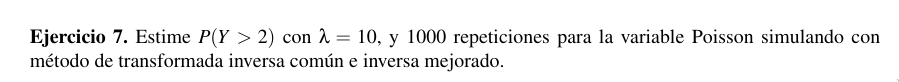


In [ ]:
def Poisson(lamda):
  U = random.random()
  i = 0; p = np.exp(-lamda)
  F = p
  while U >= F:
    i += 1
    p *= lamda / i
    F = F + p
  return i

def Poisson_mejorado(lamda):
  p = np.exp(-lamda); F = p
  for j in range(1, int(lamda) + 1):
    p *= lamda / j
    F += p
  U = random.random()
  if U >= F:
    j = int(lamda) + 1
    while U >= F:
      p *= lamda / j; F += p
      j += 1
    return j - 1
  else:
    j = int(lamda)
    while U < F:
      F -= p; p *= j/lamda
      j -= 1
    return j+1
# P(Y > 2) = 1 - (P(Y=2) + P(Y=1) + P(Y=0))
def simulation_ej7(nsim):
  p = [0] * 3
  pm = [0] * 3
  for _ in range(nsim):
    u_a = Poisson(10)
    u_b = Poisson_mejorado(10)
    if u_a < 3:
      p[u_a-1] += 1
    if u_b < 3:
      pm[u_b-1] += 1

  print(f"Probabilidad con Poisson {1 - np.sum(p) / nsim}")
  print(f"Probabilidad con Poisson mejorado {1 - np.sum(pm) / nsim}")

simulation_ej7(1_000)

Probabilidad con Poisson 1.0
Probabilidad con Poisson mejorado 0.997


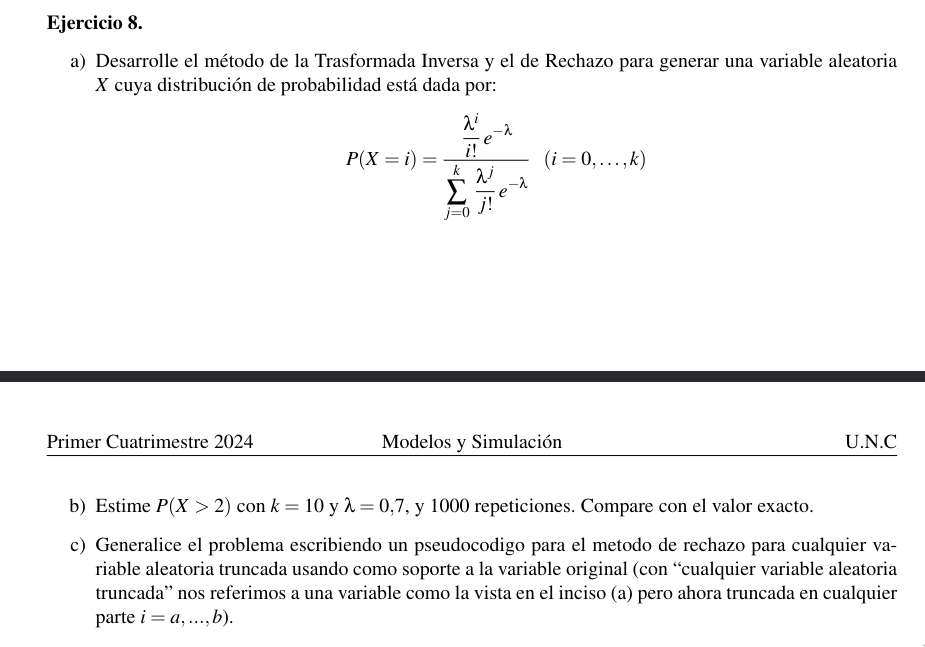

In [ ]:
# @title Default title text
def prob_poisson(lamda, i):
  return (lamda**i)*(np.e**(-lamda))/math.factorial(i)

def acumulada_poisson(lamda, k):
  return sum([prob_poisson(lamda, j) for j in range(k+1)])

def ej8_trans_inv(lamda, k):
  i = 0
  acumulado = acumulada_poisson(lamda, k)
  p = prob_poisson(lamda, i) / acumulado
  F = p
  u = random.random()
  while u >= F:
    i += 1
    p = prob_poisson(lamda, i) / acumulado
    F += p
  return i
'''
def ej8_aceptacion(lamda, k):
  sum = acumulada_poisson(lamda, k)
  c = 1/sum
  y = Poisson(lamda)
  qy = prob_poisson(lamda, y)
  while True:
    if random.random() < (prob_poisson(lamda, y) / sum) / (c * qy):
      return y
    y = Poisson(lamda)
    qy = prob_poisson(lamda, y)

'''
'''

P(X=i) / P(Y=i) = P(Y=1) / S*P(Y=i) = 1/S = c
si y > k => P(X=i) = 0
si 0 <= y <= k => P(X=y) / c * P(Y=y) = (P(Y=y) / s) * 1 / ((1/s) * P(Y=y)) = 1

'''
def ej8_aceptacion(lamda, k):
  y = Poisson(lamda)
  while True:
    if y in range(0, k+1):
      return y
    y = Poisson(lamda)

def simulation_ej8(nsim):
  p = [0] * 3
  pm = [0] * 3
  for _ in range(nsim):
    u_a = ej8_trans_inv(0.7, 10)
    if u_a < 3:
      p[u_a-1] += 1
    u_b = ej8_aceptacion(0.7, 10)
    if u_b < 3:
      pm[u_b-1] += 1

  print(f"Probabilidad con transformada inversa {1-sum(p) / nsim}")
  print(f"Probabilidad con aceptacion y rechazo {1-sum(pm) / nsim}")
  print(f"Valor exacto {0.03414158387347266}")

def aceptacion_truncada(lamda, a, b):
  y = Poisson(lamda)
  while True:
    if y in range(a, b+1):
      return y
    y = Poisson(lamda)



Probabilidad con transformada inversa 0.034170000000000034
Probabilidad con aceptacion y rechazo 0.03427999999999998
Valor exacto 0.03414158387347266


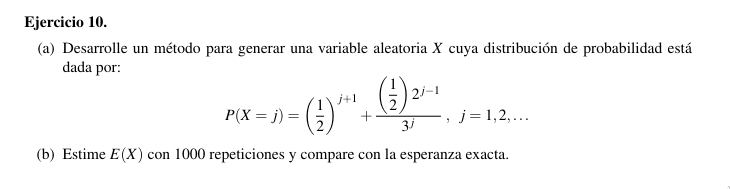

In [ ]:
def P_x(i):
  return (0.5)**(i+1) + ((0.5) * 2**(i-1)) / 3**i

def ej10():
  i = 1
  p = P_x(i)
  F = p
  u = random.random()
  while u >= F:
    i += 1
    p = P_x(i)
    F += p
  return i

def E(nsim):
    sum = 0
    for i in range(nsim):
        sum += ej10()
    return sum / nsim

def Exacta(nsim):
  E = 0
  for i in range(nsim):
    E += i * P_x(i)
  return E
nsim = 1_000
print(E(nsim))
# Too much for the 'puter
#print(Exacta(nsim))

2.494


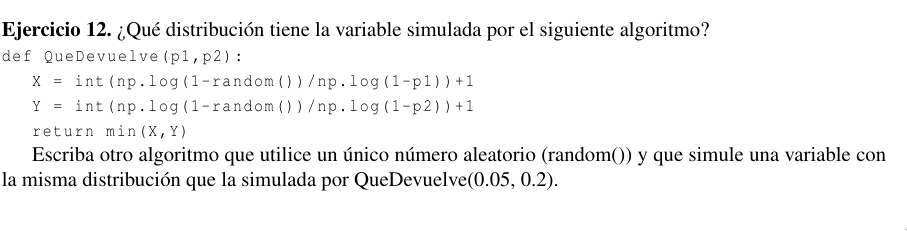

In [ ]:
def QueDevuelve(p1, p2):
  X = int(np.log(1-random.random())/np.log(1-p1)) + 1
  Y = int(np.log(1-random.random())/np.log(1-p2)) + 1
  return min(X,Y)

def Geom(p, i):
  return int(np.log(1-random.random())/np.log(1-p)) + 1

def ej12(p1, p2):
  i = 0
  p = QueDevuelve(p1, p2)
  F = p
  u = random.random()
  while u >= F:
    i += 1
    p = QueDevuelve(p1, p2)
    F += p
  return i

nsim = 10000
max = 0
a = [0] * 11
for _ in range(nsim):
  M = ej12(0.05, 0.2)
  if M > max:
    max = M

print(max)


0
